In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

def read_data_from_csv(path):
    """Load datasets from CSV files.
    Args:
        path (str): Path to the CSV file.
    Returns:
        X (np.ndarray): Features of samples.
    """
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[-1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pd.read_csv(path)
    X = data.values
    return X

# Load the data
X_public = read_data_from_csv('assignment_4_public.csv')

# Standardize the data
scaler = StandardScaler()
X_public = scaler.fit_transform(X_public)

print(X_public)


[[ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 ...
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]]


In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
best_silhouette_score = -1
best_n_clusters = 2  # Start with a minimum of 2 clusters


for n_clusters in range(2, 11):  # Try different numbers of clusters
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_labels = agg_clustering.fit_predict(X_public)
    silhouette_avg = silhouette_score(X_public, agg_labels)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters

print("Optimal number of clusters:", best_n_clusters)

/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid

Optimal number of clusters: 3


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import numpy as np


# Dunn Index
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    cluster_distances = []
    for cluster_label in range(n_clusters):
        cluster_points = X[labels == cluster_label]
        cluster_distances.append(pairwise_distances(cluster_points, cluster_points).max())
    min_inter_cluster_distance = pairwise_distances(X, metric='euclidean').max()
    dunn_index = min_inter_cluster_distance / max(cluster_distances)
    return dunn_index


# Determine the optimal number of clusters using the Dunn Index
best_dunn_index = -1
best_n_clusters = 2  # Start with a minimum of 1 clusters

for n_clusters in range(2, 11):  # Try different numbers of clusters
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clustering = agg_clustering.fit_predict(X_public)
    current_dunn_index = dunn_index(X_public, clustering)
    
    if current_dunn_index > best_dunn_index:
        best_dunn_index = current_dunn_index
        best_n_clusters = n_clusters

print("Optimal number of clusters:", best_n_clusters)

/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid

Optimal number of clusters: 7


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [10]:
n_clusters = 7

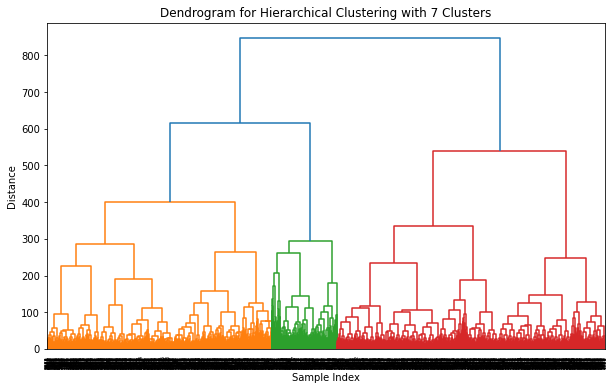

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering with 7 clusters
n_clusters = 7  # Change the number of clusters to 7
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_public)

# Create a dendrogram
linked = linkage(X_public, 'ward')  # You can experiment with different linkage methods

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering with 7 Clusters')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [6]:
# Perform hierarchical clustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
preds = agg_clustering.fit_predict(X_public)


In [9]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import numpy as np

# Perform hierarchical clustering with different numbers of clusters
best_n_clusters = 7  # Replace with the determined optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_public)

# Evaluate the clustering using Davies-Bouldin Index, Dunn Index, and Silhouette Coefficient
davies_bouldin = davies_bouldin_score(X_public, agg_labels)
silhouette_avg = silhouette_score(X_public, agg_labels)

# Dunn Index
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    cluster_distances = []
    for cluster_label in range(n_clusters):
        cluster_points = X[labels == cluster_label]
        cluster_distances.append(pairwise_distances(cluster_points, cluster_points).max())
    min_inter_cluster_distance = pairwise_distances(X, metric='euclidean').max()
    dunn_index = min_inter_cluster_distance / max(cluster_distances)
    return dunn_index

dunn = dunn_index(X_public, agg_labels)

print("Davies-Bouldin Index:", davies_bouldin)
print("Silhouette Coefficient:", silhouette_avg)
print("Dunn Index:", dunn)


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Davies-Bouldin Index: 2.352245933797236
Silhouette Coefficient: 0.10493441663211335
Dunn Index: 1.0247971912304306


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [32]:
preds = agg_clustering.fit_predict(X_public)

In [5]:
# Perform hierarchical clustering with different numbers of clusters
best_n_clusters = 7  # Replace with the determined optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='complete')
agg_labels = agg_clustering.fit_predict(X_public)

# Evaluate the clustering using Davies-Bouldin Index, Dunn Index, and Silhouette Coefficient
davies_bouldin = davies_bouldin_score(X_public, agg_labels)
silhouette_avg = silhouette_score(X_public, agg_labels)

# Dunn Index
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    cluster_distances = []
    for cluster_label in range(n_clusters):
        cluster_points = X[labels == cluster_label]
        cluster_distances.append(pairwise_distances(cluster_points, cluster_points).max())
    min_inter_cluster_distance = pairwise_distances(X, metric='euclidean').max()
    dunn_index = min_inter_cluster_distance / max(cluster_distances)
    return dunn_index

dunn = dunn_index(X_public, agg_labels)

print("Davies-Bouldin Index:", davies_bouldin)
print("Silhouette Coefficient:", silhouette_avg)
print("Dunn Index:", dunn)

/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Davies-Bouldin Index: 1.236137954467469
Silhouette Coefficient: 0.34199001522061495
Dunn Index: 1.5303394483057953


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [7]:
# Perform hierarchical clustering with different numbers of clusters
best_n_clusters = 7  # Replace with the determined optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='average')
agg_labels = agg_clustering.fit_predict(X_public)

# Evaluate the clustering using Davies-Bouldin Index, Dunn Index, and Silhouette Coefficient
davies_bouldin = davies_bouldin_score(X_public, agg_labels)
silhouette_avg = silhouette_score(X_public, agg_labels)

# Dunn Index
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    cluster_distances = []
    for cluster_label in range(n_clusters):
        cluster_points = X[labels == cluster_label]
        cluster_distances.append(pairwise_distances(cluster_points, cluster_points).max())
    min_inter_cluster_distance = pairwise_distances(X, metric='euclidean').max()
    dunn_index = min_inter_cluster_distance / max(cluster_distances)
    return dunn_index

dunn = dunn_index(X_public, agg_labels)
preds=agg_labels

print("Davies-Bouldin Index:", davies_bouldin)
print("Silhouette Coefficient:", silhouette_avg)
print("Dunn Index:", dunn)

/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Davies-Bouldin Index: 0.28997495962791126
Silhouette Coefficient: 0.5483120574074286
Dunn Index: 1.3649377458486494


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [39]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[0].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image.png'))


Saved the example image to output_images/example_image.png


In [38]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[11].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image1.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image1.png'))


Saved the example image to output_images/example_image.png


In [11]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[0].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image0.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image0.png'))


Saved the example image to output_images/example_image0.png


In [13]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[23].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image23.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image5.png'))


Saved the example image to output_images/example_image5.png


In [8]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[4].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image4.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image4.png'))


Saved the example image to output_images/example_image4.png


In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Load the training data (public dataset)
def read_data_from_csv(path):
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[-1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'
    data = pd.read_csv(path)
    X = data.values  # Assuming each row represents an image (28x28 pixels)
    return X

X_public = read_data_from_csv('assignment_4_public.csv')

# Standardize the data
scaler = StandardScaler()
X_public = scaler.fit_transform(X_public)
# Try different numbers of clusters
n_clusters_list = range(2, 11)
silhouette_scores = []
clusterings = []

# Perform K-Means clustering for each number of clusters
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    clustering = kmeans.fit_predict(X_public)
    clusterings.append(clustering)
    silhouette_avg = silhouette_score(X_public, clustering)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_n_clusters = n_clusters_list[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_n_clusters)

/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` w

Optimal number of clusters: 2


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [5]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import numpy as np

# Evaluate the clustering using Davies-Bouldin Index, Dunn Index, and Silhouette Coefficient
davies_bouldin = davies_bouldin_score(X_public, cluster_labels)
silhouette_avg = silhouette_score(X_public, cluster_labels)

# Dunn Index
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    cluster_distances = []
    for cluster_label in range(n_clusters):
        cluster_points = X[labels == cluster_label]
        cluster_distances.append(pairwise_distances(cluster_points, cluster_points).max())
    min_inter_cluster_distance = pairwise_distances(X, metric='euclidean').max()
    dunn_index = min_inter_cluster_distance / max(cluster_distances)
    return dunn_index

dunn = dunn_index(X_public, cluster_labels)

print("Davies-Bouldin Index:", davies_bouldin)
print("Silhouette Coefficient:", silhouette_avg)
print("Dunn Index:", dunn)

/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Davies-Bouldin Index: 2.165267395340117
Silhouette Coefficient: 0.10559236545878302
Dunn Index: 1.1216344942313576


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [13]:
submission = pd.DataFrame({'Label': preds})
submission.to_csv('assignment_4.csv', index=True, index_label='Id')

In [12]:
#however although the Davies-Bouldin Index: 0.23134909296592285
#Silhouette Coefficient: 0.6661107920453977
#Dunn Index: 1.2181738978671293  seems better than other but the result only 0,so we choose K means

In [12]:

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_public)
preds=kmeans.labels_

/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score


db_scores = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels = kmeanModel.fit_predict(X_public)
    db_score = davies_bouldin_score(X_public, labels)
    db_scores.append(db_score)

# Find the optimal number of clusters
optimal_n_clusters = K[db_scores.index(min(db_scores))]
print("Optimal number of clusters:", optimal_n_clusters)


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Optimal number of clusters: 4


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels = kmeanModel.fit_predict(X_public)
    silhouette_avg = silhouette_score(X_public, labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_n_clusters = K[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters:", optimal_n_clusters)


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` w

Optimal number of clusters: 2


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance

# Load and preprocess your data (X_public) as needed

# Dunn Index
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    cluster_distances = []
    for cluster_label in range(n_clusters):
        cluster_points = X[labels == cluster_label]
        cluster_distances.append(pairwise_distances(cluster_points, cluster_points).max())
    min_inter_cluster_distance = pairwise_distances(X, metric='euclidean').max()
    dunn_index = min_inter_cluster_distance / max(cluster_distances)
    return dunn_index


# Determine the optimal number of clusters using the Dunn Index
best_dunn_index = -1
best_n_clusters = 2  # Start with a minimum of 1 clusters

for n_clusters in range(2, 14):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    clustering = kmeans.fit_predict(X_public)
    current_dunn_index = dunn_index(X_public, clustering)
    
    if current_dunn_index > best_dunn_index:
        best_dunn_index = current_dunn_index
        best_n_clusters = n_clusters

print("Optimal number of clusters:", best_n_clusters)


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matm

Optimal number of clusters: 8


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [9]:
# Determine the optimal number of clusters
best_n_clusters = 8  # Replace with the determined optimal number of clusters

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=1)
preds = kmeans.fit_predict(X_public)

/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
submission = pd.DataFrame({'Label': preds})
submission.to_csv('assignment_4.csv', index=True, index_label='Id')

In [14]:
#after trying optimal n_cluster, I find that the n_cluster=8 would be the best in Kmeans.

In [12]:
#So the result should be Kmeans at optimal n_cluster=8